<a href="https://colab.research.google.com/github/pang-lang/MLCrabAgePrediction/blob/main/23005227_Kueh_Pang_Lang_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Lab**
## **Introduction**

In this lab work assignment, your task is to develop a program that utilizes your knowledge of regression techniques to predict the ages of crabs (in months) based on the given features. You will need to analyze the dataset, preprocess data, train, and evaluate different regression models, and compare their performance. The dataset for this task is provided, named ‘ModifiedCrabAgePrediction.csv’.


1. `Data Analysis` - Load and analyze the given dataset of crab age. Explore the dataset to gain insights into the data. Identify the features (e.g., sex, length, diameter, height, etc.) and the target variable (age) in the dataset.
2. `Data Preprocessing` - Perform data preprocessing tasks such as handling missing values, handling categorical variables, and scaling/normalizing the numerical features. Split the dataset into training and testing sets for model evaluation.
3. `Regression Model Development` - Implement a regression model (e.g., linear regression, polynomial regression, etc.) to predict crab ages based on the features. Train the regression model using the training dataset obtained from step 2. Experiment with different hyperparameters (e.g. regularization, learning rate, etc.) and compare their performance in step 4.
4. `Model Evaluation` - Analyze the best performance of the regression model on testing set. Please report the evaluation result using minimum MSE, RMSE and R2.

**Importing libraries**

- `NumPy` arrays are faster and more compact than Python lists.

- `Pandas` is a Python library for data analysis.
- `Seaborn` is a library in Python predominantly used for making statistical graphics.
- `Matplotlib` is a multi-platform data visualization library built on NumPy arrays.


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Import dataset
DATA_DIR_1 = "/content/ModifiedCrabAgePrediction.csv"
data = pd.read_csv (DATA_DIR_1, header=0)

# **Data Analysis**

*   Load and analyze the given dataset of crab age.
*   Explore the dataset to gain insights into the data.
*   Identify the features (e.g., sex, length, diameter, height, etc.)
*   Identify the target variable (age) in the dataset.

In [ ]:
# Checking data
print("\nInformation of the dataset")
print(data.info())

print("\nNumber of unique value for each column")
print(data.nunique())

print("\nDetermining the data types")
print(data.dtypes)

print("\nFeatures of the dataset ")
print(data.columns)

print("\nFirst few rows of the dataset ")
print(data.head())



Information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB
None

Number of unique value for each column
Sex                  3
Length             132
Diameter           111
Height              51
Weight            2191
Shucked Weight    1435
Viscera Weight     855
Shell Weight       870
Age                 27
dtype: int64

Determining the data types
Sex           

**Identify the features and the target variable**

In [ ]:
# Identify categorical and numerical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

# Identify and print the features and target variable
features = data.columns[0:7]
print('\nFeatures:', features)

target = data['Age']
print("\nTarget variable: ", target.name)
print("Unique value in the target variable")
print(target.unique())

print(f'\nMaximum age\t: {data.Age.max()/12}')
print(f'Mean age\t: {data.Age.mean()/12}')
print(f'Minimum age\t: {data.Age.min()/12}')

Categorical columns: ['Sex']
Numerical columns: ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

Features: Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight'],
      dtype='object')

Target variable:  Age
Unique value in the target variable
[ 9  6 10  8 15 13  7 11 20  5 17  4 12 19 26 14 23 18 16  3 24 21  1 22
 29 25 27]

Maximum age	: 2.4166666666666665
Mean age	: 0.8314761904761904
Minimum age	: 0.08333333333333333


# **Data Preprocessing**



*   Handle missing values
*   Handle categorical variables
*   Scaling/normalizing the numerical features
*   Split the dataset into training and testing sets for model evaluation.


**Handle missing value**

The first step is to identify the missing values in the dataset. These missing values can occur due to various reasons such as data collection errors, data corruption, or simply because the data was not recorded.

In [ ]:
print("\nFind missing value of each column")
print(data.isna().sum())



Find missing value of each column
Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


**Imputation**

Once missing values are identified in the dataset, the next step is to impute them using the `Mean/Median/Mode Imputation method`. This technique replaces missing values with the mean, median, or mode of the respective column.

`Mean Imputation`: This method is suitable when the missing values occur randomly throughout the dataset. It calculates the average value of the column and replaces the missing values with this mean value. In our dataset, mean imputation is applied to the 'Length', 'Diameter', and 'Height' variables, where missing values are assumed to be randomly distributed.

`Median Imputation`: When the distribution of data in a column is skewed or contains outliers, median imputation is preferred over mean imputation. The median, which represents the middle value of the data when arranged in ascending order, is used to replace missing values. In our dataset, median imputation is used for the 'Weight' variable due to its diverse and skewed distribution.

`Mode Imputation`: This method is primarily used for categorical variables. It replaces missing values with the most frequent category (mode) in the respective column. Since there are no missing values in categorical data in our dataset, mode imputation is not applied.

In [ ]:
# Computation & imputation of mean by using mean()
# Imputation of missing data with its mean by using fillna()
mean_length = data.Length.mean ()
print("\nMean of the length: %.2f" % mean_length)
data.Length.fillna(mean_length, inplace=True)
print("\nImpute missing length data with mean value:")
print(data.isna().sum())

mean_diameter = data.Diameter.mean ()
print("\n\nMean of the diameter: %.2f" % mean_diameter)
data.Diameter.fillna(mean_diameter, inplace=True)
print("\nImpute missing diameter data with mean value:")
print(data.isna().sum())

mean_Height = data.Height.mean ()
print("\n\nMean of the height: %.2f" % mean_Height)
data.Height.fillna(mean_Height, inplace=True)
print("\nImpute missing height data with mean value:")
print(data.isna().sum())

# Computation of median by using median()
# Imputation of missing data with its median by using fillna()
median_weight = data.Weight.median()
print("\nMedian of the weight: %.2f" % median_weight)
data.Weight.fillna(median_weight, inplace=True)
print("\nImpute missing data with median value:")
print(data.isna().sum())



Mean of the length: 1.31

Impute missing length data with mean value:
Sex                0
Length             0
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


Mean of the diameter: 1.02

Impute missing diameter data with mean value:
Sex                0
Length             0
Diameter           0
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64


Mean of the height: 0.35

Impute missing height data with mean value:
Sex                0
Length             0
Diameter           0
Height             0
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

Median of the weight: 23.12

Impute missing data with median value:
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucke

In [ ]:
print("\nFinal dataset after handling missing values")
print(data.isna().sum())
print(data.head())



Final dataset after handling missing values
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64
  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  


**Handling categorical variables**

Handling categorical data involves encoding categorical variables into numerical format, making them suitable for machine learning algorithms. Here, a technique known as `label encoding` to handle categorical variables. Label encoding involves converting categorical values into numerical representations by assigning a unique integer to each category. In this case, the 'Sex' column, which contains categorical values ('M', 'F', 'I' representing Male, Female, and Infant respectively), is transformed into numerical format by replacing these categories with integer labels ('M' with 1, 'F' with 2, and 'I' with 3).

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Handling categorical variables
print("\nHandle categorical variables")
label_encoder = LabelEncoder()
for column in data.select_dtypes(exclude=[np.number]):
    data[column] = label_encoder.fit_transform(data[column])

print("DataFrame with Categorical Features:")
print(data.head())

print("\nUnique values in the 'Sex' column:", data['Sex'].unique())

# Replace categorical data with numbers directly in the original DataFrame 'data'
print("\nValue counts for the 'Sex' column:")
print(data.Sex.value_counts())

# Update 'Sex' column in 'data'
data.Sex.replace({"M": 1, "F": 2, "I": 3 }, inplace=True)
print("\nFirst few rows of the 'Sex' column")
print(data.head())



Handle categorical variables
DataFrame with Categorical Features:
   Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1    2  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2    1  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3    0  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4    1  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  

Unique values in the 'Sex' column: [0 2 1]

Value counts for the 'Sex' column:
Sex
2    1293
0    1110
1    1097
Name: count, dtype: int64

First few rows of the 'Sex' column
   Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    0  1.4375    1.1750  0.4125  24.635715       12.332033      

**Removing outliers**

Outliers are data points that significantly deviate from the rest of the dataset and may arise due to errors in data collection or represent rare events. Here, the outliers are identified uby finding the interquartile range (IQR).

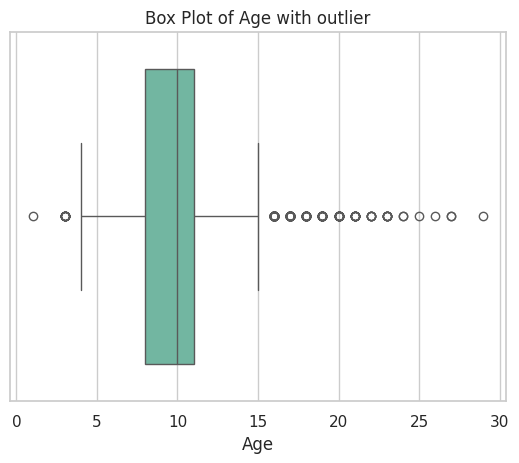

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='Age', orient='h')
plt.title('Box Plot of Age with outlier')
plt.show()

Remove outlier
IQR: 3.00
Lower_Fence: 3.50
Upper_Fence: 15.50

Display Outliers
      Sex  Length  Diameter  Height     Weight  Shucked Weight  \
18      0  1.4875    1.1875  0.4250  35.351827       13.607760   
37      1  1.3750    1.1000  0.4125  24.394745        8.845044   
40      0  1.7750    1.4125  0.4875  48.945412       18.086981   
64      2  1.9375    1.4250  0.5500  57.606184       20.836883   
67      2  1.5750    1.2875  0.4000  28.803092       11.949314   
...   ...     ...       ...     ...        ...             ...   
3421    2  1.6250    1.3000  0.4750  38.115903       14.713390   
3435    2  1.6375    1.3125  0.4625  35.692020       13.806207   
3465    2  1.5125    1.1875  0.4000  45.812792       15.578050   
3474    0  1.2375    1.0000  0.3875  18.271253        6.860579   
3488    0  1.7125    1.3125  0.4375  48.477645       15.351254   

      Viscera Weight  Shell Weight  Age  
18          6.378637     12.048538   20  
37          4.791066      8.504850   17  
4

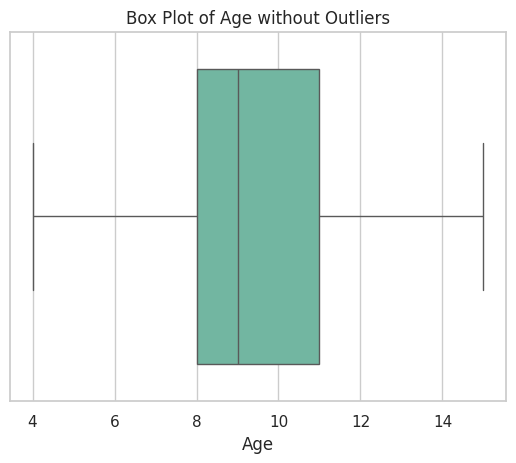

In [ ]:
print("Remove outlier")
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1
print ("IQR: %.2f" %IQR)
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

print("\nDisplay Outliers")
print (data[((data["Age"] < Lower_Fence) | (data["Age"] > Upper_Fence))])
data = (data[~((data["Age"] < Lower_Fence) | (data["Age"] > Upper_Fence))])

sns.boxplot(data=data, x='Age', orient='h')
plt.title('Box Plot of Age without Outliers')
plt.show()

**Transforming Data of Different Scale**

Transforming data of different scales is a preprocessing step aimed at ensuring that all features in a dataset have similar scales or distributions. Here we used the `Min-Max scaling` that transforms the features to a fixed range, between 0 and 1. It does this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value). This technique preserves the original distribution's shape while ensuring all features are on the same scale.

In [ ]:
from sklearn import preprocessing

print (data.head())
null_ = data.isna().any()
dtypes = data.dtypes
info = pd.concat ([null_,dtypes], axis = 1, keys = ['Null', 'type'])
print(info)

print("\nUsing Min Max Scaler Method")
minmax_scale = preprocessing.MinMaxScaler().fit_transform(data)
data = pd.DataFrame (minmax_scale, columns = data.columns)
print(data.head())


   Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1    2  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2    1  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3    0  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4    1  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  
                 Null     type
Sex             False    int64
Length          False  float64
Diameter        False  float64
Height          False  float64
Weight          False  float64
Shucked Weight  False  float64
Viscera Weight  False  float64
Shell Weight    False  float64
Age             False    int64

Using Min Max Scaler Method
   Sex    Length  Diameter    Height    Weight  

**Splitting dataset**

Splitting the dataset is a process that involves dividing the dataset into two or more subsets: typically a training set and a test set. The purpose of splitting the dataset is to train the model on one subset `(training set)` and evaluate its performance on another subset `(test set)` that it hasn't seen during training. The model's predictions on this subset are compared against the true labels or values to calculate performance metrics such as accuracy, precision, recall, or mean squared error. The data is shuffled to randomise the data, to avoid biasness before proceed to spliting the data

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

print("Splitting dataset")
DV = 'Age'
# dropping 1st label that being detected
df_dummies = pd.get_dummies(data, drop_first=True)
print('There are {} columns in df_dummies'.format(df_dummies.shape[1]))
df_shuffled = shuffle(df_dummies, random_state=42)
X = df_shuffled.drop([DV], axis=1)
y = df_shuffled[DV]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=42)

num_train = X_train.shape[0]
print("Number of samples in X_train:", num_train)
num_test = X_test.shape[0]
print("Number of samples in X_test:", num_test)

print("\n", X_train.head ())


Splitting dataset
There are 9 columns in df_dummies
Shape of X: (3271, 8)
Shape of y: (3271,)
Number of samples in X_train: 2616
Number of samples in X_test: 655

       Sex    Length  Diameter    Height    Weight  Shucked Weight  \
1786  1.0  0.642336  0.657658  0.132743  0.370892        0.361767   
103   1.0  0.642336  0.576577  0.115044  0.314012        0.284895   
802   0.0  0.481752  0.504505  0.106195  0.162514        0.116318   
677   0.5  0.583942  0.540541  0.101770  0.167750        0.133176   
1438  1.0  0.729927  0.720721  0.141593  0.390935        0.331760   

      Viscera Weight  Shell Weight  
1786        0.264861      0.310453  
103         0.254293      0.295340  
802         0.141347      0.184509  
677         0.129458      0.181990  
1438        0.287979      0.392317  


# **Regression Model Development**

*   Implement a regression model to predict crab ages based on the features
*   Train the regression model using the training dataset
*   Experiment with different hyperparameters
*   Compare their performance in step 4




**Linear regression model**

Linear regression aims to predict the value of a dependent variable based on the values of one or more independent variables. It assumes that there exists a linear relationship between the independent variables and the dependent variable.


**Polynomial regression model**

Polynomial regression allows to capture complex relationships between variables that cannot be adequately modeled by simple linear regression. The model fits a polynomial function to the data points by minimizing the sum of the squares of the differences between the observed and predicted values .

**Plotting**

`Correlation Coefficient Plot`:
The first graph displays the correlation coefficient between the observed values and the predicted values. The coefficient is calculated using Pearson's correlation coefficient (r), which measures the linear relationship between two variables. The title of the plot includes the correlation coefficient value, which is approximately r = 0.74. This value suggests a strong positive linear relationship between the observed and predicted values.

`Histogram of Residuals`:
The second graph is a histogram of residuals, which represent the differences between the observed values and the predicted values from the regression model.

Multiple Regression Model




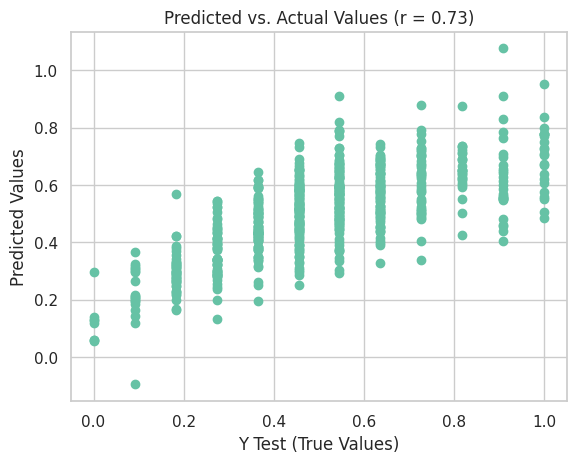

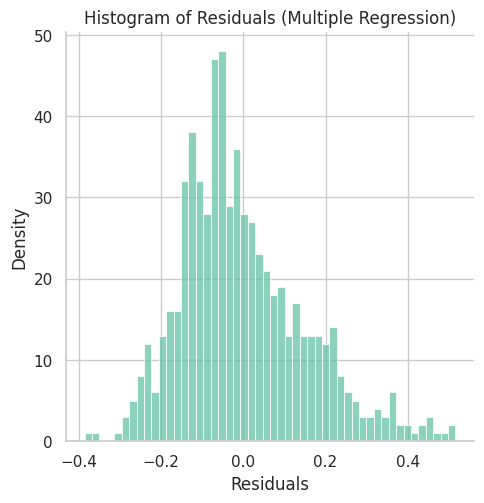


From linear regression model
Mean squared error	: 0.023049545074218764
Root Mean Squared Error	: 0.15182076628122637
R-squared		: 0.5298740592434947


In [ ]:
# Multiple Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

print("Multiple Regression Model")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.fit(X_train, y_train)
intercept = model.intercept_
coefficients = model.coef_
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("\n")
import matplotlib.pyplot as plt
# Plotting Scatter Plot
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0], 2))
plt.show()

# Plotting Histogram of Residuals
sns.displot((y_test - predictions), bins=50)  # Assuming predictions is correct
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Multiple Regression)')
plt.show()

print('\nFrom linear regression model')
print(f'Mean squared error\t: {mse}')
print(f"Root Mean Squared Error\t: {rmse}")
print(f'R-squared\t\t: {r2}')


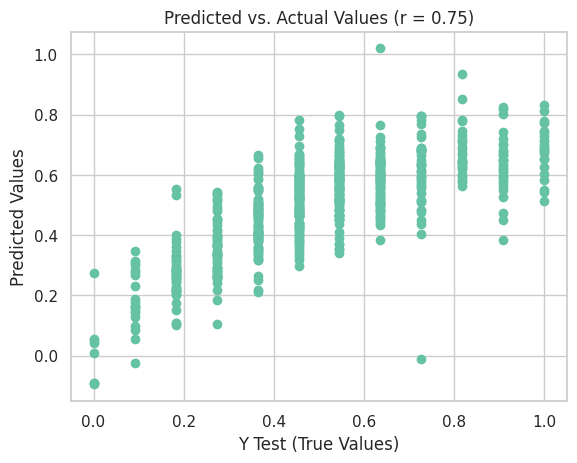

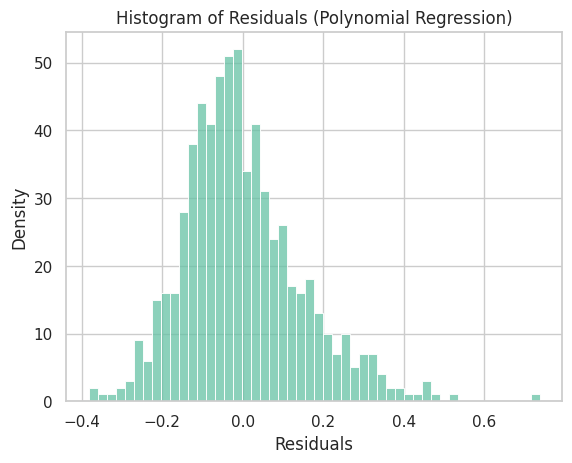


Polynomial Regression Model Evaluation:
Mean Squared Error	: 0.02168120475944262
Root Mean Squared Error	: 0.14724538960335098
R-squared		: 0.5577831687590105


In [ ]:
#Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr  # Import pearsonr for correlation coefficient calculation

# Define the degree of the polynomial
degree = 2

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions
predictions_poly = model_poly.predict(X_test_poly)

# Model Evaluation
mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, predictions_poly)

# Plotting Scatter Plot
plt.scatter(y_test, predictions_poly)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, predictions_poly)
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearson_corr))
plt.show()

# Plotting Histogram of Residuals
sns.histplot((y_test - predictions_poly), bins=50)  # Use sns.histplot instead of sns.displot
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Polynomial Regression)')
plt.show()

# Print Model Evaluation Metrics
print('\nPolynomial Regression Model Evaluation:')
print(f'Mean Squared Error\t: {mse_poly}')
print(f'Root Mean Squared Error\t: {rmse_poly}')
print(f'R-squared\t\t: {r2_poly}')


**Hyperparameters**

Hyperparameters are parameters of a machine learning algorithm that are not learned directly from the data during training, but rather are set prior to training and are used to control the learning process.

`Learning rate`:

We also have `learning rate` is a hyperparameter that determines the step size at which the model's parameters are updated during training. A higher learning rate means that the model parameters will be updated more aggressively with each iteration, potentially leading to faster convergence but also risking overshooting the optimal solution. On the other hand, a lower learning rate means slower updates, which may lead to more stable convergence but may also require more training iterations to reach the optimal solution.


`Ridge Regularization`:

For this dataset, we use `Ridge Regularization` and utilizes `GridSearchCV` from scikit-learn for hyperparameter tuning. It defines a range of alpha values (alpha_values) and searches for the best alpha value within this range using cross-validation. It trains the final Ridge regression model using the best alpha value obtained from the grid search and povides the model's evaluation metrics using the best alpha value.


**Learning Rate**

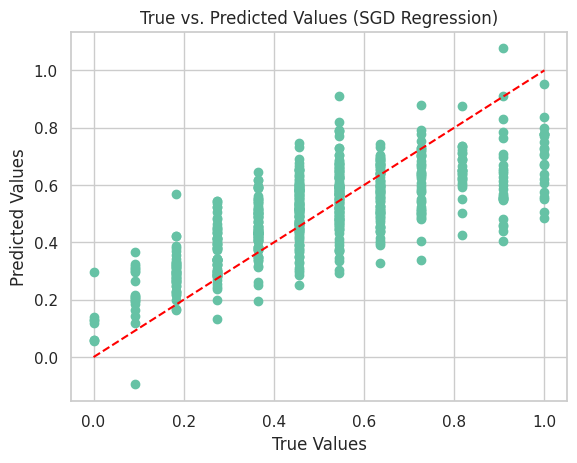

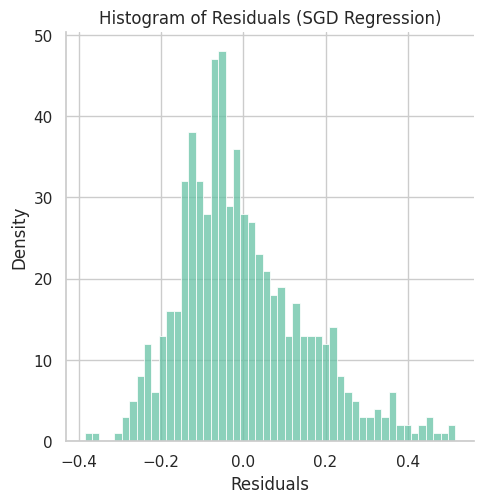


From SGD regression model
Mean squared error	: 0.023049545074218764
Root Mean Squared Error	: 0.15182076628122637
R-squared		: 0.48949258880774593


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a linear regression model with stochastic gradient descent optimizer
model = make_pipeline(
    StandardScaler(),
    SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)
)

# Fit the model on the training data
model.fit(X_train, y_train)


# Visualize the predicted vs actual value
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (SGD Regression)')
plt.show()

# Plotting Histogram of Residuals
sns.displot((y_test - y_pred), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (SGD Regression)')
plt.show()

print('\nFrom SGD regression model')
print(f'Mean squared error\t: {mse}')
print(f"Root Mean Squared Error\t: {rmse}")
print(f'R-squared\t\t: {score}')


**Ridge Regularization**

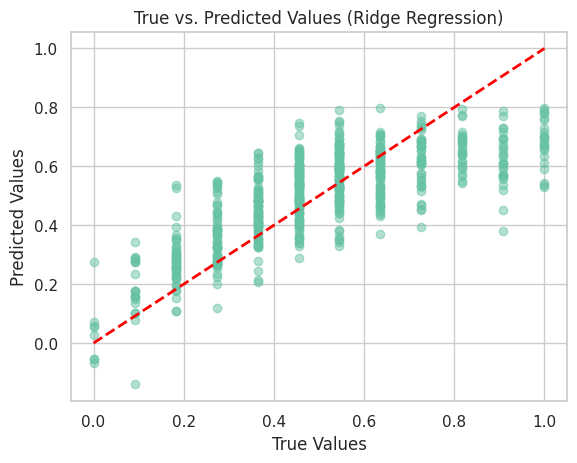

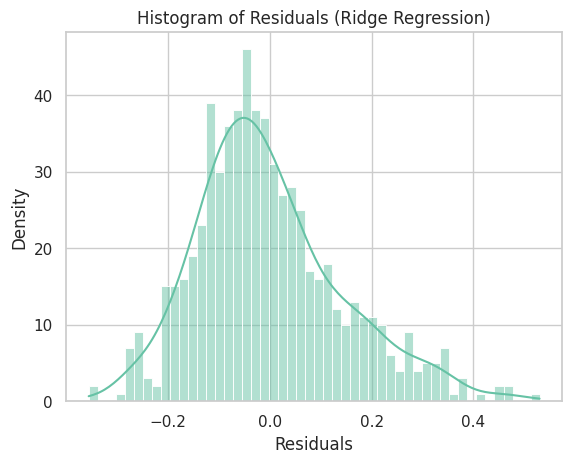


From polynomial regression model with Ridge regularization
Mean squared error	: 0.02074478101547921
Root Mean Squared Error	: 0.14403048640992366
R-squared		: 0.576882768866517


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the degree of the polynomial
degree = 2

# Polynomial feature transformation
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Define the Ridge regression model
ridge = Ridge()

# Define the range of alpha values to search using logarithmic scale
alpha_values = np.logspace(-3, 2, 6)

# Define the hyperparameter grid
param_grid = {'alpha': alpha_values}

# Create a grid search object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search to find the best alpha value
grid_search.fit(X_train_poly, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train the final Ridge regression model with the best alpha value
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = final_model.predict(X_test_poly)

# Scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values (Ridge Regression)')
plt.grid(True)  # Add grid lines
plt.show()

# Plotting Histogram of Residuals
sns.histplot((y_test - y_pred), bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Ridge Regression)')
plt.grid(True)  # Add grid lines
plt.show()

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('\nFrom polynomial regression model with Ridge regularization')
print(f'Mean squared error\t: {mse}')
print(f"Root Mean Squared Error\t: {rmse}")
print(f'R-squared\t\t: {r2}')


# **Model Evaluation**

*   Analyze the best performance of the regression model on testing set.
*   Report the evaluation result using minimum MSE, RMSE and R2.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Report evaluation results
print("Model Evaluation Results:")
print(f"Minimum MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")


Model Evaluation Results:
Minimum MSE: 0.026151762939873605
RMSE: 0.16171506713931638
R-squared (R2): 0.46660022508206056


# **Conclusion**

Based on the provided model evaluation results:

**`Linear Regression Model`:**

Mean squared error	: 0.023

Root Mean Squared Error	: 0.152

R-squared		: 0.530


**`Polynomial Regression Model`:**

Mean Squared Error	: 0.022

Root Mean Squared Error	: 0.147

R-squared		: 0.558


**`Polynomial Regression Model with Learning Rate (SGD regression)`:**

Mean Squared Error	: 0.023

Root Mean Squared Error	: 0.152

R-squared		: 0.489

**`Polynomial Regression Model with Ridge Regularization`:**

Mean Squared Error	: 0.021

Root Mean Squared Error	: 0.144

R-squared		: 0.577


**`Overall Model Evaluation`:**

Mean Squared Error	: 0.024

Root Mean Squared Error	: 0.154

R-squared		: 0.516



The `Polynomial Regression Model with Ridge Regularization` performs the best among the models evaluated, having the lowest MSE and RMSE, and the highest R-squared value. This indicates that it provides the best fit to the data among the evaluated models.

The `Polynomial Regression Model` also shows promising performance, with competitive MSE, RMSE, and R-squared values compared to the Ridge Regularization model, indicating that adding polynomial features helped capture more complex relationships in the data.

The `Linear Regression Model` and the `Polynomial Regression Model with Learning Rate (SGD regression)` perform relatively worse compared to the other models, with higher MSE and RMSE values and lower R-squared values.

Overall, the `Polynomial Regression Model with Ridge Regularization` is recommended for this dataset due to its superior performance in terms of predictive accuracy.

Thus, we can conclude that the **best**

**Mean Squared Error	:** 0.021

**Root Mean Squared Error	:** 0.144

**R-squared		:** 0.577
